In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# uploading file
from google.colab import files
uploaded = files.upload()

Saving train-perceptron.txt to train-perceptron.txt


In [5]:
# getting the dataset into a dataframe
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['train-perceptron.txt'] ), sep=" " ,  header = None, dtype = 'float64')
print(df)

     0    1    2
0  1.0  1.0  1.0
1  1.0 -1.0  1.0
2  2.0  2.5  2.0
3  0.0  2.0  2.0
4  2.0  3.0  2.0
5  4.0  5.0  1.0


In [7]:
# Separating the data according to their classes
class_1 = df[df[2] == 1.0]
print('Class - 1\n', class_1)
class_2 = df[df[2] == 2.0]
print('\nClass - 2\n', class_2)

Class - 1
      0    1    2
0  1.0  1.0  1.0
1  1.0 -1.0  1.0
5  4.0  5.0  1.0

Class - 2
      0    1    2
2  2.0  2.5  2.0
3  0.0  2.0  2.0
4  2.0  3.0  2.0


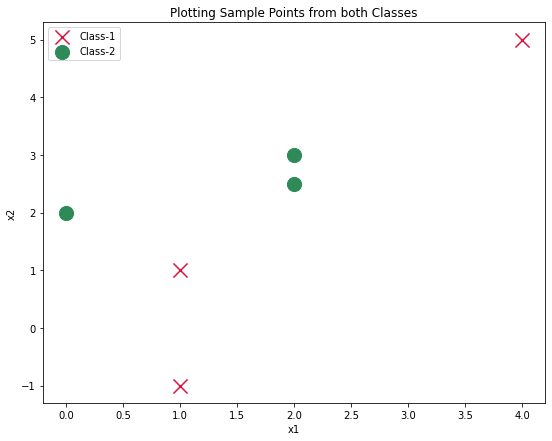

In [9]:
# Plotting Sample Points from both Classes
plt.figure(figsize = (9, 7)) #width, height
plt.title('Plotting Sample Points from both Classes')
plt.xlabel('x1')
plt.ylabel('x2')

plt.scatter(class_1[0],class_1[1], s=200, color='crimson', marker = 'x', label='Class-1')
plt.scatter(class_2[0],class_2[1], s=200, color='seagreen', marker = 'o', label='Class-2')
plt.legend()

In [35]:
# Calculating Phi Function
def calculate_phi(x1, x2, normalization):
  if normalization == True:
    return (np.dot((x1**2, x2**2, x1*x2, x1, x2, 1.0), -1))
  else:
    return (x1**2, x2**2, x1*x2, x1, x2, 1.0)

In [36]:
class_1_array = pd.DataFrame(class_1).to_numpy()
class_2_array = pd.DataFrame(class_2).to_numpy()

y = np.empty([df[0].size, df[1].size])

for i in range(class_1[0].size):
  y[i] = (calculate_phi(class_1_array[i][0], class_1_array[i][1], normalization = False))

# Normalizing class-2 data points
for i in range(class_2[0].size):
  y[i+class_1[0].size] = (calculate_phi(class_2_array[i][0], class_2_array[i][1], normalization = True))

for i in y:
  print(i)

[1. 1. 1. 1. 1. 1.]
[ 1.  1. -1.  1. -1.  1.]
[16. 25. 20.  4.  5.  1.]
[-4.   -6.25 -5.   -2.   -2.5  -1.  ]
[ 0. -4.  0.  0. -2. -1.]
[-4. -9. -6. -2. -3. -1.]


In [40]:
# One at a time or Single Update
def one_at_a_time(weight, learning_rate):
  lr = learning_rate
  iter_count = 0
  mc_count = -1

  while(mc_count != 0):
    mc_count = 0
    for i in range(len(y)):
      g_y = np.dot(y[i], weight)
      if g_y <= 0.0:
        mc_count += 1
        weight = weight + lr*y[i]
    iter_count += 1 
  return iter_count

In [41]:
# Many at a time or Batch Update
def many_at_a_time(weight, learning_rate):
  lr = learning_rate
  iter_count = 0
  mc_count = -1

  while(mc_count != 0):
    mc_count = 0
    sum_mc = np.zeros_like(y[0])
    for i in range(len(y)):
      g_y = np.dot(y[i], weight)
      if g_y <= 0.0:
        mc_count += 1
        sum_mc += y[i]
    weight = weight + lr*sum_mc
    iter_count += 1 
  return iter_count

In [42]:
weight = np.ones_like(y[0])
print('Initial Weight Vector - All One', weight)
print('-------------------------------')
print('Alpha (learning rate)\tOne at a Time\tMany at a Time')
print('------------------------------------------------------')
one_at_a_time_one_list = []
many_at_a_time_one_list = []
for i in np.arange(0.1, 1.1, 0.1):
  one_at_a_time_iter_one = one_at_a_time(weight, i)
  one_at_a_time_one_list.append(one_at_a_time_iter_one)
  many_at_a_time_iter_one = many_at_a_time(weight, i)
  many_at_a_time_one_list.append(many_at_a_time_iter_one)
  print('{:.1f}'.format(i),'\t\t\t',one_at_a_time_iter_one,'\t\t',many_at_a_time_iter_one)

Initial Weight Vector - All One [1. 1. 1. 1. 1. 1.]
-------------------------------
Alpha (learning rate)	One at a Time	Many at a Time
------------------------------------------------------
0.1 			 6 		 102
0.2 			 92 		 104
0.3 			 104 		 91
0.4 			 106 		 116
0.5 			 93 		 105
0.6 			 93 		 114
0.7 			 108 		 91
0.8 			 115 		 91
0.9 			 94 		 105
1.0 			 94 		 93


In [44]:
weight = np.zeros_like(y[0])
print('Initial Weight Vector - All Zero', weight)
print('--------------------------------')
print('Alpha (learning rate)\tOne at a Time\tMany at a Time')
print('------------------------------------------------------')
one_at_a_time_zero_list = []
many_at_a_time_zero_list = []
for i in np.arange(0.1, 1.1, 0.1):
  one_at_a_time_iter_zero = one_at_a_time(weight, i)
  one_at_a_time_zero_list.append(one_at_a_time_iter_zero)
  many_at_a_time_iter_zero = many_at_a_time(weight, i)
  many_at_a_time_zero_list.append(many_at_a_time_iter_zero)
  print('{:.1f}'.format(i),'\t\t\t', one_at_a_time_iter_zero,'\t\t', many_at_a_time_iter_zero)

Initial Weight Vector - All Zero [0. 0. 0. 0. 0. 0.]
--------------------------------
Alpha (learning rate)	One at a Time	Many at a Time
------------------------------------------------------
0.1 			 94 		 105
0.2 			 94 		 105
0.3 			 94 		 92
0.4 			 94 		 105
0.5 			 94 		 92
0.6 			 94 		 105
0.7 			 94 		 105
0.8 			 94 		 105
0.9 			 94 		 105
1.0 			 94 		 92


In [45]:
np.random.seed(170204059)
weight = np.random.random(len(y[0]))
print('Initial Weight Vector - Randomly Initialized', weight)
print('--------------------------------------------')

print('Alpha (learning rate)\tOne at a Time\tMany at a Time')
print('------------------------------------------------------')
one_at_a_time_random_list = []
many_at_a_time_random_list = []
for i in np.arange(0.1, 1.1, 0.1):
  one_at_a_time_iter_random = one_at_a_time(weight, i)
  one_at_a_time_random_list.append(one_at_a_time_iter_random)
  many_at_a_time_iter_random = many_at_a_time(weight, i)
  many_at_a_time_random_list.append(many_at_a_time_iter_random)
  print('{:.1f}'.format(i),'\t\t\t',one_at_a_time_iter_random,'\t\t',many_at_a_time_iter_random)

Initial Weight Vector - Randomly Initialized [0.74478765 0.36476433 0.87151425 0.28655727 0.07513938 0.40204927]
--------------------------------------------
Alpha (learning rate)	One at a Time	Many at a Time
------------------------------------------------------
0.1 			 91 		 106
0.2 			 94 		 95
0.3 			 106 		 98
0.4 			 101 		 106
0.5 			 101 		 106
0.6 			 100 		 106
0.7 			 113 		 121
0.8 			 106 		 88
0.9 			 112 		 88
1.0 			 110 		 101


In [46]:
x_label = ["{:.1f}".format(i) for i in np.arange(0.1, 1.1, 0.1)]
width = 0.35
index = np.arange(10)

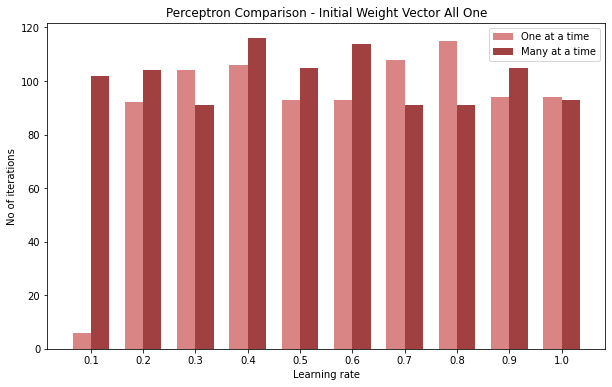

In [47]:
plt.figure(figsize = (10, 6))
plt.title('Perceptron Comparison - Initial Weight Vector All One')
plt.bar(index, one_at_a_time_one_list, width, color='indianred', label='One at a time', alpha=0.75)
plt.bar(index + width, many_at_a_time_one_list, width, color='maroon', label='Many at a time', alpha=0.75)
plt.xlabel('Learning rate')
plt.ylabel('No of iterations')
plt.xticks(index+width/2, x_label)
plt.legend()
plt.show()

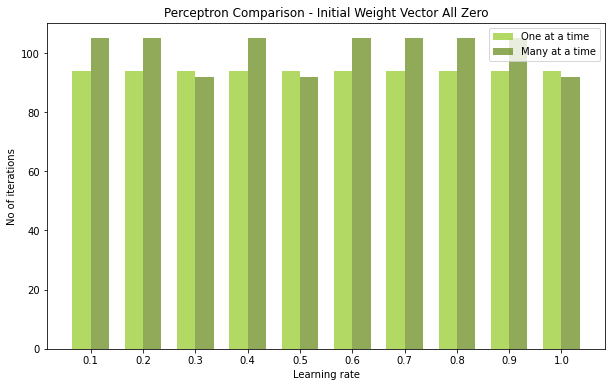

In [53]:
plt.figure(figsize = (10, 6))
plt.title('Perceptron Comparison - Initial Weight Vector All Zero')
plt.bar(index, one_at_a_time_zero_list, width, color='yellowgreen', label='One at a time', alpha=0.75)
plt.bar(index + width, many_at_a_time_zero_list, width, color='olivedrab', label='Many at a time', alpha=0.75)
plt.xlabel('Learning rate')
plt.ylabel('No of iterations')
plt.xticks(index+width/2, x_label)
plt.legend()
plt.show()

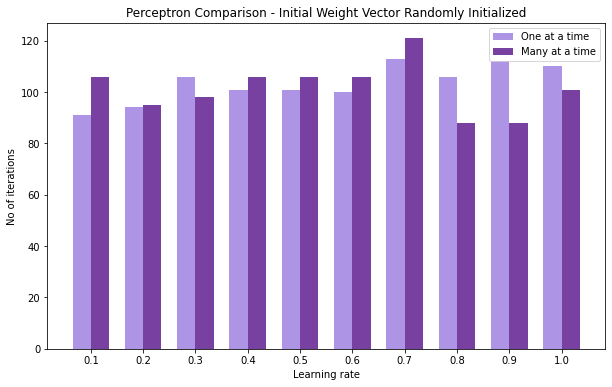

In [55]:
plt.figure(figsize = (10, 6))
plt.title('Perceptron Comparison - Initial Weight Vector Randomly Initialized')
plt.bar(index, one_at_a_time_random_list, width, color='mediumpurple', label='One at a time', alpha=0.75)
plt.bar(index + width, many_at_a_time_random_list, width, color='indigo', label='Many at a time', alpha=0.75)
plt.xlabel('Learning rate')
plt.ylabel('No of iterations')
plt.xticks(index+width/2, x_label)
plt.legend()
plt.show()